In [9]:
import tweepy
import json
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from vaderSentiment.vaderSentiment import SentimentIntensityAnalyzer
analyzer = SentimentIntensityAnalyzer()

consumer_key = 'ytaFff5GreJqZQnCDhmTczdI1'
consumer_secret = 'olqlg3rsfxjVWzZTZde230tYVFERyn2lAAWKEE5UdcZZbGDA3m'
access_token = '409702063-6bA8HGdezt26yWT1aNdvSzUeBZzZylSJaRo61jWi'
access_token_secret = 'r7OSRnVBs0K60WPX5dZGfrNxbN1EJQtZdaWPqlEQorGuz'
#codes expired

auth = tweepy.OAuthHandler(consumer_key, consumer_secret)
auth.set_access_token(access_token, access_token_secret)
api = tweepy.API(auth, parser=tweepy.parsers.JSONParser())

#__________________________________________________--

target_users = ['@BBCWorld', '@CBS', '@CNN', '@FoxNews', '@nytimes']
all_user_list = []
all_timestamp_list = []
all_compound_list = []
all_pos_list = []
all_neu_list = []
all_neg_list = []
all_text_list = []
all_sentiment_list = []
all_tweets_ago_list = []

for target_user in target_users:
    user_list = []
    timestamp_list = []
    compound_list = []
    pos_list = []
    neu_list = []
    neg_list = []
    text_list = []
    tweets_ago_list = []
    tweet_count = 0
    
    for x in range(5):
        public_tweets = api.user_timeline(target_user, page=x)

        for tweet in public_tweets:
            timestamp = tweet["created_at"]
            compound = analyzer.polarity_scores(tweet["text"])["compound"]
            pos = analyzer.polarity_scores(tweet["text"])["pos"]
            neu = analyzer.polarity_scores(tweet["text"])["neu"]
            neg = analyzer.polarity_scores(tweet["text"])["neg"]
            user_list.append(tweet["user"]["screen_name"])
            timestamp_list.append(timestamp)
            compound_list.append(compound)
            pos_list.append(pos)
            neu_list.append(neu)
            neg_list.append(neg)
            text_list.append(tweet["text"])
            tweet_count += 1
            tweets_ago_list.append(tweet_count)
    
          #appending list for full tweepy  
    all_user_list.append(user_list)
    all_timestamp_list.append(timestamp_list)
    all_compound_list.append(compound_list)
    all_pos_list.append(pos_list)
    all_neu_list.append(neu_list)
    all_neg_list.append(neg_list)
    all_text_list.append(text_list)
    all_tweets_ago_list.append(tweets_ago_list)
            
        
    sentiments = np.mean(compound_list)
    all_sentiment_list.append(sentiments)

In [10]:
all_user_list = np.array(all_user_list).flatten().tolist()
all_timestamp_list = np.array(all_timestamp_list).flatten().tolist()
all_compound_list = np.array(all_compound_list).flatten().tolist()
all_pos_list = np.array(all_pos_list).flatten().tolist()
all_neu_list = np.array(all_neu_list).flatten().tolist()
all_neg_list = np.array(all_neg_list).flatten().tolist()
all_text_list = np.array(all_text_list).flatten().tolist()
all_tweets_ago_list = np.array(all_tweets_ago_list).flatten().tolist()

In [11]:
sentiment = {'User': all_user_list, 'Timestamp': all_timestamp_list, 'Compound_Score': all_compound_list, 'Pos_Score': all_pos_list, 'Neu_Score': all_neu_list, 'Neg_Score': all_neg_list, 'Tweets_Ago': all_tweets_ago_list, 'Tweet_Text': all_text_list}
sentiment_df = pd.DataFrame(sentiment)
sentiment_df.to_csv("Twitter_News_Outlet_Sentiment.csv", index=False, header=True)
sentiment_df

,User,Timestamp,Compound_Score,Pos_Score,Neu_Score,Neg_Score,Tweets_Ago,Tweet_Text
0,BBCWorld,Wed Oct 17 23:47:01 +0000 2018,0.0000,0.000,1.000,0.000,1,Cannabis in Canada: How it went down on Legali...
1,BBCWorld,Wed Oct 17 23:21:28 +0000 2018,-0.6908,0.000,0.630,0.370,2,Sri Lanka's Sirisena calls India over 'murder ...
2,BBCWorld,Wed Oct 17 23:09:57 +0000 2018,0.2235,0.173,0.827,0.000,3,Central African Republic: 'Why a grenade could...
3,BBCWorld,Wed Oct 17 23:07:33 +0000 2018,0.0000,0.000,1.000,0.000,4,Why is Germany beefing-up its military? https:...
4,BBCWorld,Wed Oct 17 23:03:01 +0000 2018,0.5574,0.338,0.662,0.000,5,Venezuelans escape to Spain and ask to return ...
5,BBCWorld,Wed Oct 17 22:35:41 +0000 2018,-0.6597,0.000,0.645,0.355,6,Jayme Closs: Hunt for 13-year-old after parent...
6,BBCWorld,Wed Oct 17 21:58:36 +0000 2018,-0.7845,0.000,0.465,0.535,7,Viktoria Marinova: Suspect in journalist murde...
7,BBCWorld,Wed Oct 17 20:44:33 +0000 2018,0.0000,0.000,1.000,0.000,8,Healthcare in US: The big election story not b...
8,BBCWorld,Wed Oct 17 20:32:58 +0000 2018,0.0000,0.000,1.000,0.000,9,Jamal Khashoggi disappearance: US asks Turkey ...
9,BBCWorld,Wed Oct 17 19:47:01 +0000 2018,-0.4767,0.131,0.584,0.285,10,Norway apologises to its World War Two 'German...


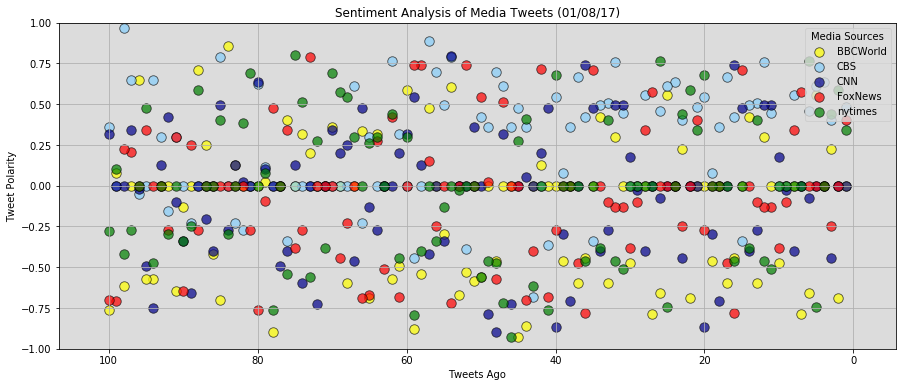

In [12]:
users = sentiment_df['User'].unique()
colors = ['yellow', 'lightskyblue', 'darkblue', 'red', 'green']

for i in range(len(users)):
    plt.scatter(x=sentiment_df[sentiment_df['User']==users[i]]['Tweets_Ago'].values,
                y=sentiment_df[sentiment_df['User']==users[i]]['Compound_Score'].values,
                s = 90,#*sentiment_df[sentiment_df['User']==users[i]]['Tweets_Ago'].values,
                c = colors[i], label = users[i],
                alpha = .7, edgecolor = 'black', linewidth = .8)

plt.xlabel("Tweets Ago")
plt.ylabel("Tweet Polarity")
plt.title("Sentiment Analysis of Media Tweets (01/08/17)")
plt.legend(title="Media Sources", loc='upper right')
plt.grid()
plt.gcf().set_size_inches(15, 6)
plt.rcParams['axes.facecolor'] = 'gainsboro'
ax = plt.gca()
ax.set_xlim(ax.get_xlim()[::-1])
plt.ylim(-1, 1)
plt.savefig("Sentiment_Analysis_Tweets.png")
plt.show()

In [13]:
avg_sentiment = {'User': target_users, 'Avg_Compound_Score': all_sentiment_list}
avg_sentiment_df = pd.DataFrame(avg_sentiment)
avg_sentiment_df

,User,Avg_Compound_Score
0,@BBCWorld,-0.139727
1,@CBS,0.236973
2,@CNN,-0.043163
3,@FoxNews,-0.043371
4,@nytimes,-0.018187


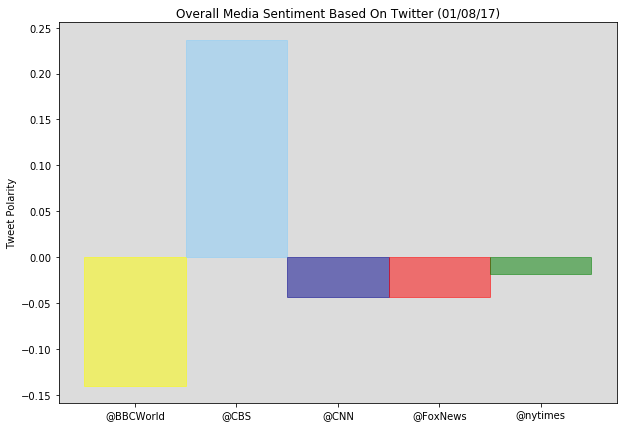

In [14]:
x_values = np.arange(len(avg_sentiment_df))
plt.figure(figsize=(10, 7))
barlist=plt.bar(x_values, avg_sentiment_df["Avg_Compound_Score"], alpha=0.5, align='center', width=1)
plt.xticks(x_values, avg_sentiment_df["User"], rotation="horizontal")


for i in range(len(barlist)):
    barlist[i].set_color(colors[i])
plt.ylabel("Tweet Polarity")
plt.title("Overall Media Sentiment Based On Twitter (01/08/17)")
plt.savefig("Overall_Media_Sentiment.png")
plt.show()

In [ ]:
# Observed Trends
#    1) CNN has an average compound score closest to zero, meaning that CNN's tweets are the most neutral in this dataset.
#    2) Both BBC and NY Times have negative 'compound sentiment' values over their last 100 tweets. BBC is substantially more negative than NY Times.
#    3) According to Vader sentiment analysis CBS has the most positive 'compound sentiment' over their previous 100 tweets. 